In [1]:
import torch
from datetime import datetime
from torch import nn
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from tqdm.auto import tqdm
import numpy as np

from models import Generator_28, Discriminator_28
from utils import get_noise, get_gradient_penalty, show_tensor_images
from imagenet_c import corrupt


In [2]:
architecture = 'DCGAN' # DCGAN or WGAN-GP
conditional = False
corrupt_dataset = True

n_epochs = 30
z_dim = 64
display_step = 500
batch_size = 128
lr = 0.0002
beta_1 = 0.5
beta_2 = 0.999
c_lambda = 10
device = 'cuda'

if architecture == 'DCGAN': 
    criterion = nn.BCEWithLogitsLoss()
    crit_repeats = 1
elif architecture == 'WGAN-GP':
    crit_repeats = 5

im_shape = (1, 28, 28)
n_classes = 10 if conditional else 0 # number of classes
im_chan = im_shape[0] # 1 for black and white

corruption_transform = transforms.Lambda(
    lambda x: corrupt(np.uint8(x), 
    np.random.randint(1, 6), 
    corruption_name='gaussian_noise'))

if corrupt_dataset:
    transform = transforms.Compose([
        corruption_transform,
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),
    ])
else:
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),
    ])

dataloader = DataLoader(
    MNIST('../data', download=False, transform=transform),
    batch_size=batch_size,
    shuffle=True)

In [3]:

generator_input_dim = z_dim + n_classes
discriminator_im_chan = im_chan + n_classes

gen = Generator_28(generator_input_dim).to(device)
gen_opt = torch.optim.Adam(gen.parameters(), lr=lr, betas=(beta_1, beta_2))
crit = Discriminator_28(discriminator_im_chan).to(device) 
crit_opt = torch.optim.Adam(crit.parameters(), lr=lr, betas=(beta_1, beta_2))

def weights_init(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.ConvTranspose2d):
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
    if isinstance(m, nn.BatchNorm2d):
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
        torch.nn.init.constant_(m.bias, 0)
gen = gen.apply(weights_init)
crit = crit.apply(weights_init)

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 1, step 500: Generator loss: 1.7425491824150086, critic loss: 0.3036359572783113


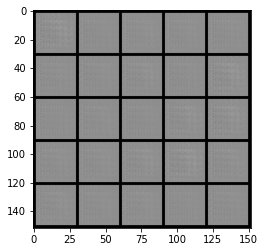

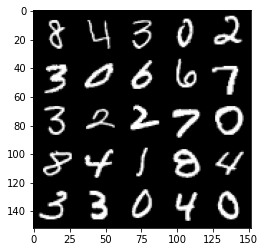

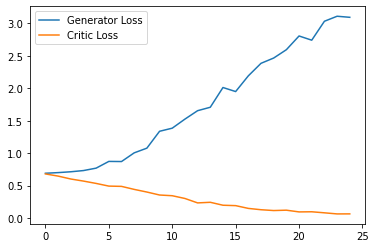

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 2, step 1000: Generator loss: 4.006779850482941, critic loss: 0.03224755620956421


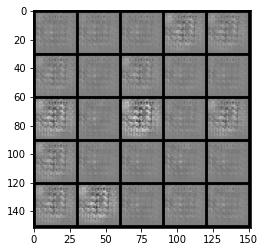

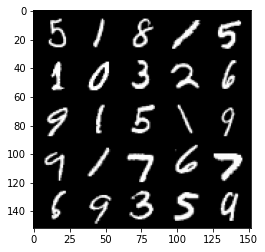

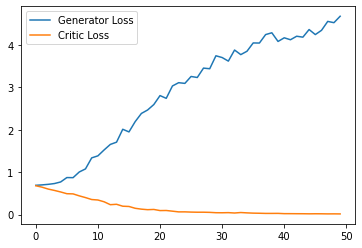

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 3, step 1500: Generator loss: 3.503439861059189, critic loss: 0.1274300577826798


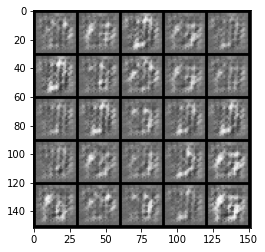

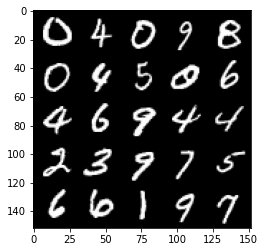

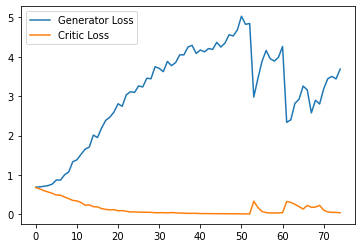

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 4, step 2000: Generator loss: 2.2153657377362252, critic loss: 0.29565100437402725


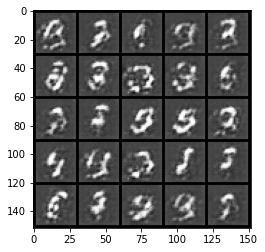

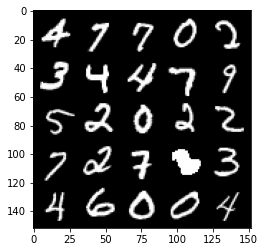

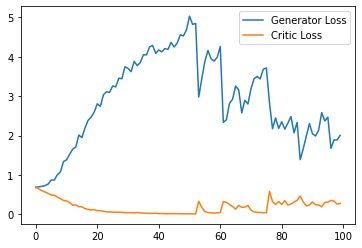

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 5, step 2500: Generator loss: 1.9245230984985828, critic loss: 0.3252511199712753


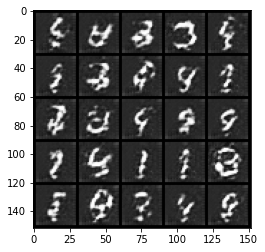

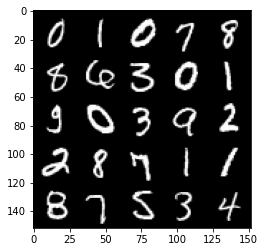

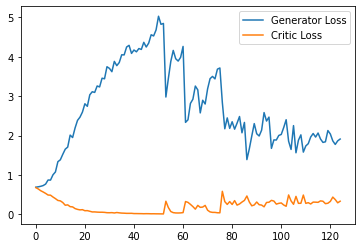

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 6, step 3000: Generator loss: 1.6151249783039092, critic loss: 0.3933760069310665


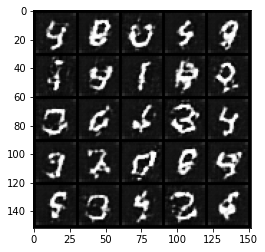

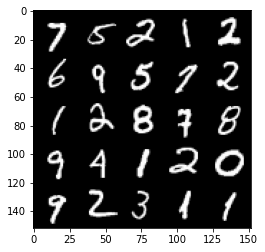

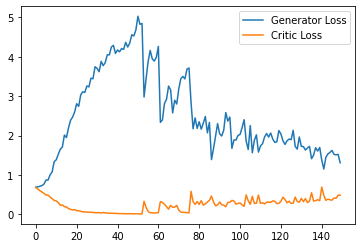

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 7, step 3500: Generator loss: 1.401807888239622, critic loss: 0.41873120695352556


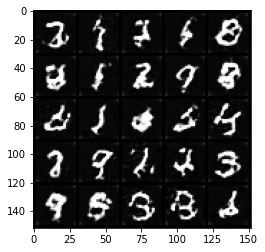

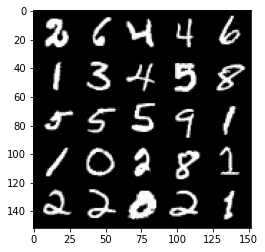

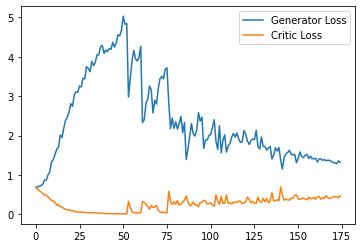

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 8, step 4000: Generator loss: 1.2425835558176042, critic loss: 0.46389537417888643


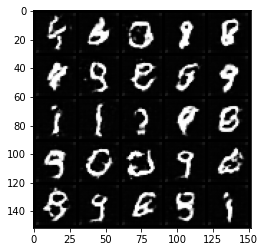

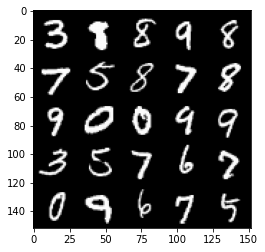

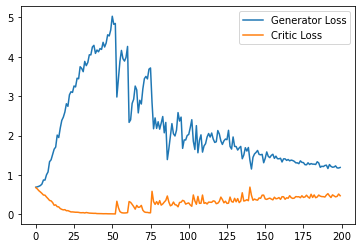

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 9, step 4500: Generator loss: 1.1930973896384238, critic loss: 0.4808274480700493


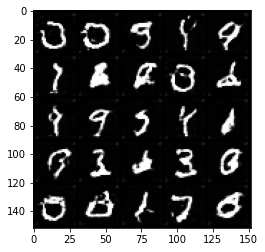

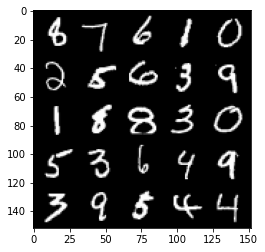

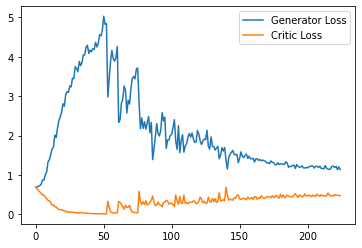

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 10, step 5000: Generator loss: 1.1639125331789255, critic loss: 0.4973606227040291


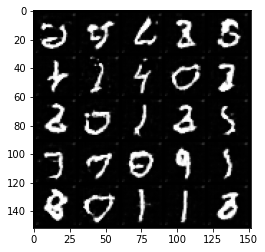

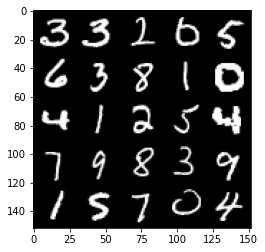

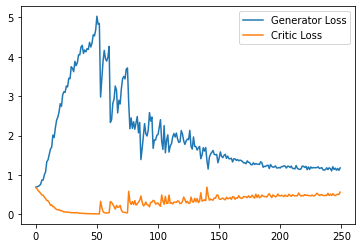

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 11, step 5500: Generator loss: 1.147445626705885, critic loss: 0.5064893234968185


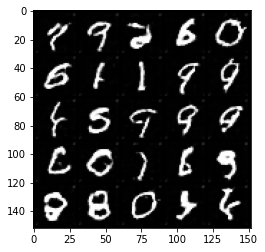

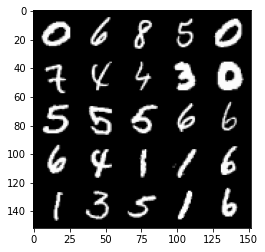

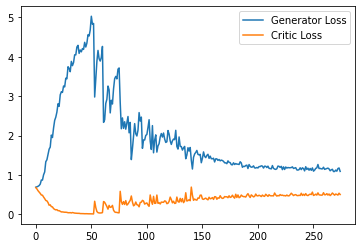

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 12, step 6000: Generator loss: 1.1206077067255973, critic loss: 0.518121298789978


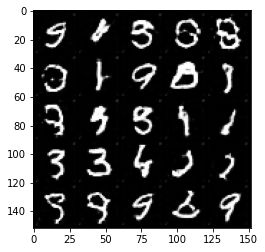

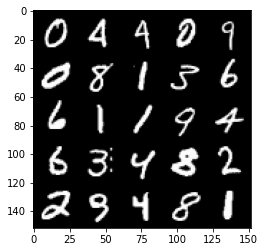

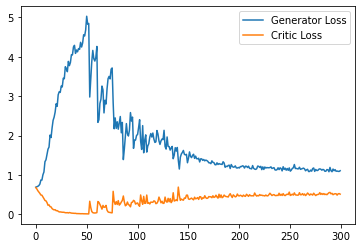

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 13, step 6500: Generator loss: 1.107103394806385, critic loss: 0.5292068547010422


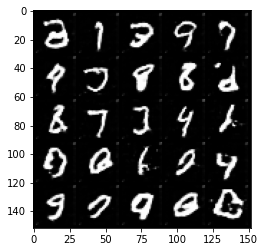

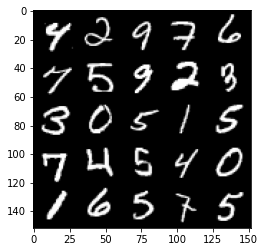

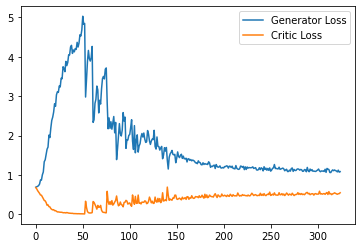

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 14, step 7000: Generator loss: 1.0890939514636993, critic loss: 0.5350081439018249


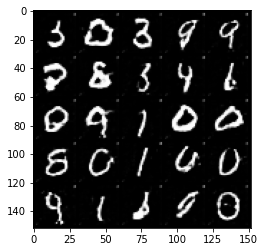

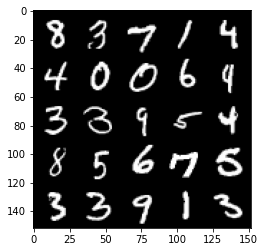

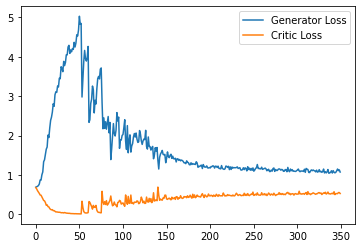

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 15, step 7500: Generator loss: 1.0847435917556285, critic loss: 0.5448595575094223


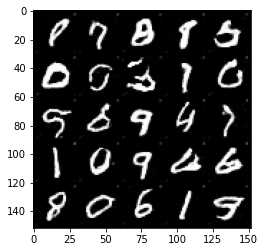

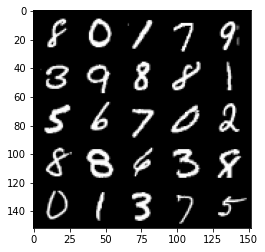

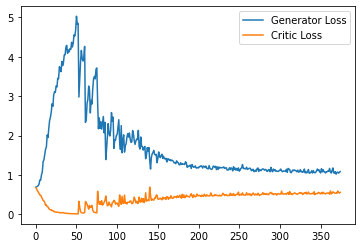

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 17, step 8000: Generator loss: 1.0626695936024189, critic loss: 0.5484299380779266


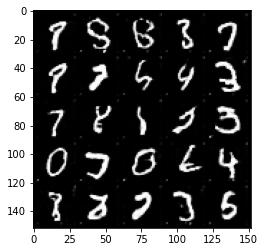

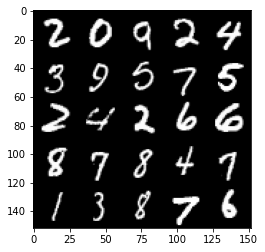

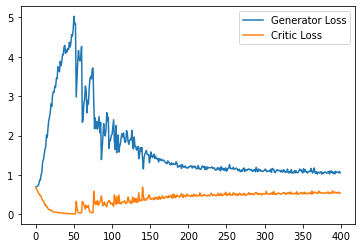

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 18, step 8500: Generator loss: 1.0486916792094707, critic loss: 0.558738341808319


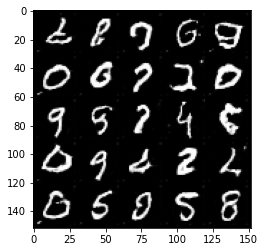

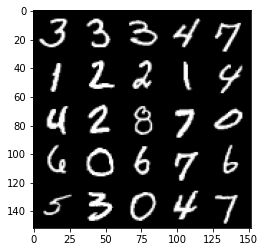

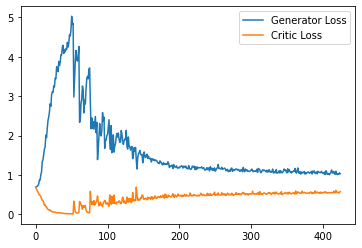

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 19, step 9000: Generator loss: 1.0322090966403485, critic loss: 0.565253445982933


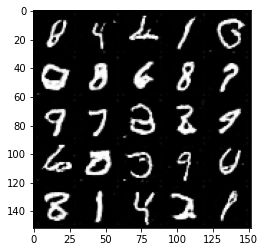

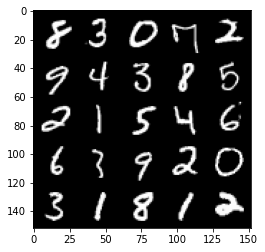

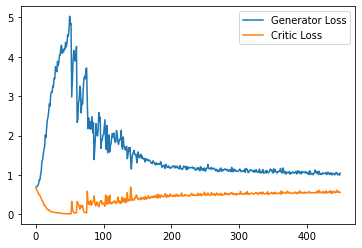

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 20, step 9500: Generator loss: 1.0354275721907615, critic loss: 0.5725583280920983


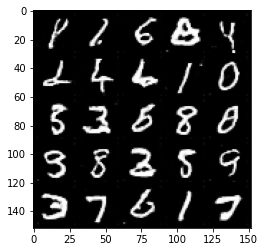

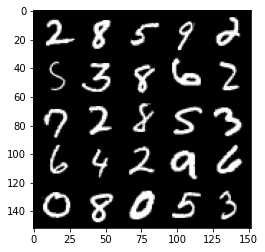

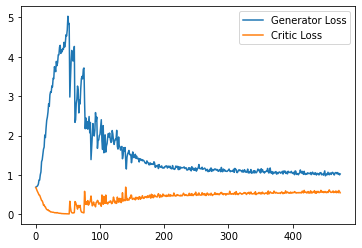

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 21, step 10000: Generator loss: 1.0171915436387062, critic loss: 0.5795447611212731


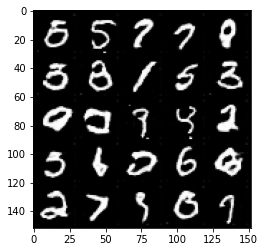

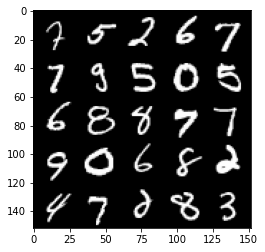

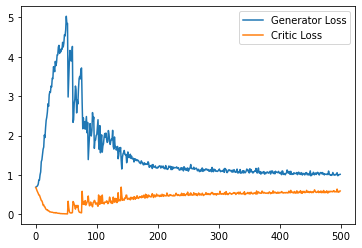

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 22, step 10500: Generator loss: 1.0018697468936444, critic loss: 0.5833962252736091


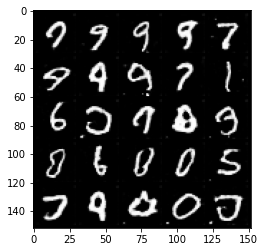

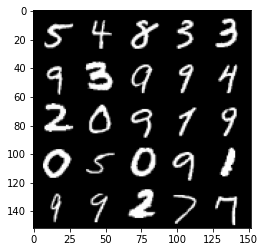

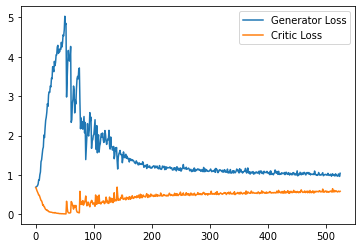

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 23, step 11000: Generator loss: 0.9928174640238285, critic loss: 0.5847582668662071


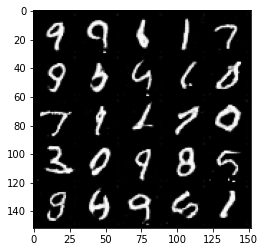

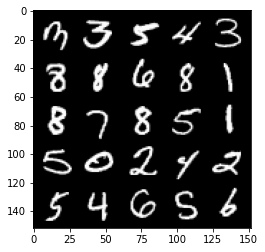

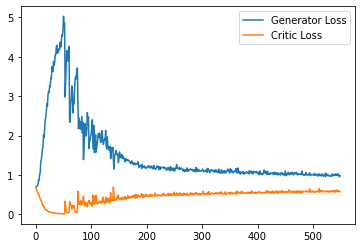

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 24, step 11500: Generator loss: 0.9918697859048844, critic loss: 0.5944383573532105


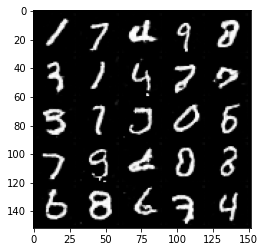

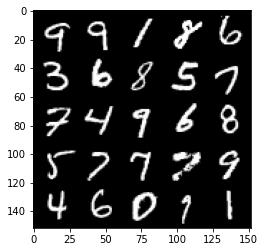

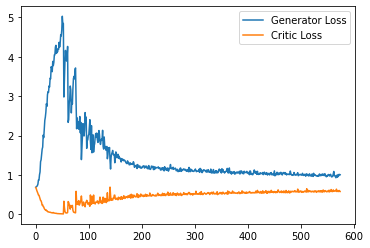

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 25, step 12000: Generator loss: 0.9639442239701748, critic loss: 0.5980140358805657


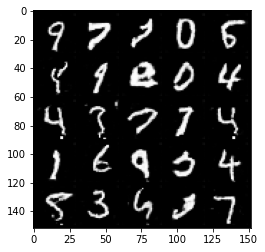

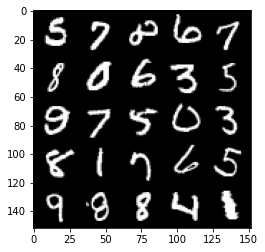

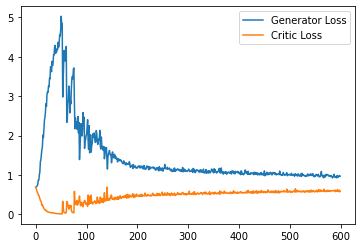

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 26, step 12500: Generator loss: 0.9681725216507912, critic loss: 0.6017346893548965


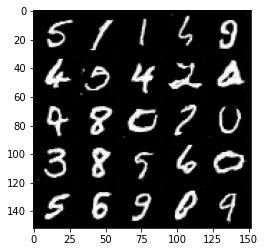

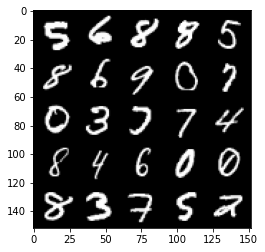

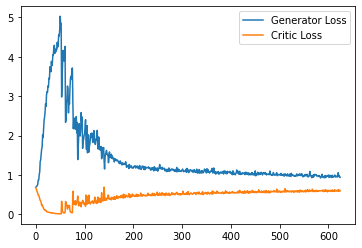

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 27, step 13000: Generator loss: 0.9614776736497879, critic loss: 0.6046498328447342


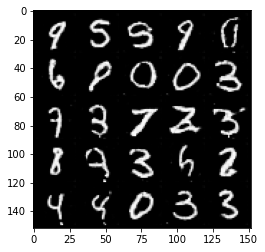

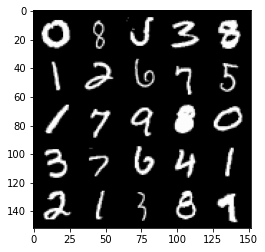

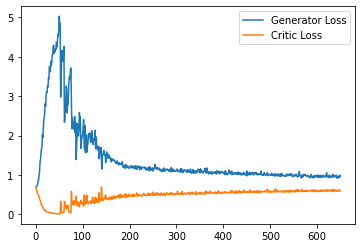

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 28, step 13500: Generator loss: 0.9544609622061253, critic loss: 0.6083688237667084


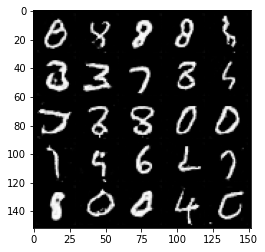

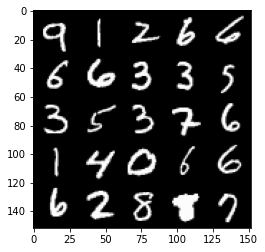

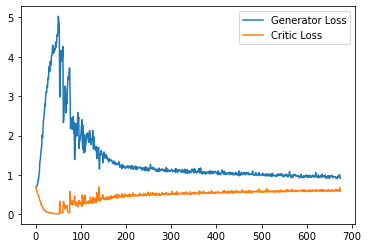

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 29, step 14000: Generator loss: 0.9452151880264282, critic loss: 0.6105849673748016


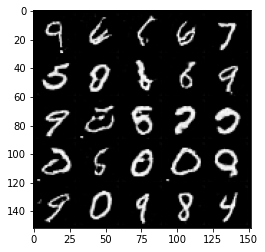

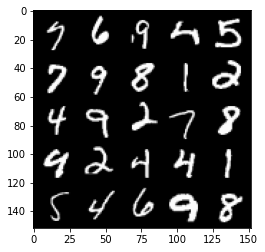

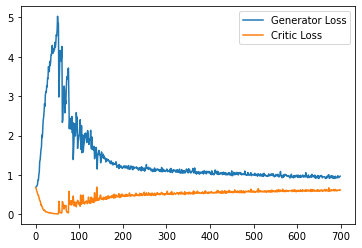

In [4]:
import matplotlib.pyplot as plt

cur_step = 0
generator_losses = []
critic_losses = []
for epoch in range(n_epochs):
    # Dataloader returns the batches
    for real, labels in tqdm(dataloader):
        cur_batch_size = len(real)
        real = real.to(device)

        # Format labels
        if conditional:
            one_hot_labels = nn.functional.one_hot(labels.to(device), n_classes)
            image_one_hot_labels = one_hot_labels[:, :, None, None]
            image_one_hot_labels = image_one_hot_labels.repeat(1, 1, im_shape[1], im_shape[2])

        mean_iteration_critic_loss = 0
        for _ in range(crit_repeats):
            ### Update critic/discriminator ###
            crit_opt.zero_grad()
            fake_noise = get_noise(cur_batch_size, z_dim, device=device)
            if conditional:
                noise_and_labels = torch.cat((fake_noise.float(), one_hot_labels.float()), dim=1)
                fake = gen(noise_and_labels)
                fake_image_and_labels = torch.cat((fake.detach().float(), image_one_hot_labels.float()), dim=1)
                real_image_and_labels = torch.cat((real.float(), image_one_hot_labels.float()), dim=1)
                crit_fake_pred = crit(fake_image_and_labels)
                crit_real_pred = crit(real_image_and_labels)
            else:
                fake = gen(fake_noise)
                crit_fake_pred = crit(fake.detach())
                crit_real_pred = crit(real)

            if architecture == 'DCGAN':
                crit_fake_loss = criterion(crit_fake_pred, torch.zeros_like(crit_fake_pred))
                crit_real_loss = criterion(crit_real_pred, torch.ones_like(crit_real_pred))
                crit_loss = (crit_fake_loss + crit_real_loss) / 2
            elif architecture == 'WGAN-GP':
                epsilon = torch.rand(len(real), 1, 1, 1, device=device, requires_grad=True)
                # gradient = get_gradient(crit, real, fake.detach(), epsilon)
                # gp = gradient_penalty(gradient)
                # crit_loss = get_crit_loss(crit_fake_pred, crit_real_pred, gp, c_lambda)
                gp = get_gradient_penalty(crit, real, fake.detach(), epsilon)
                crit_loss = torch.mean(crit_fake_pred - crit_real_pred) + c_lambda*gp

            # Keep track of the average critic loss in this batch
            mean_iteration_critic_loss += crit_loss.item() / crit_repeats
            # Update gradients
            crit_loss.backward(retain_graph=True)
            # Update optimizer
            crit_opt.step()
        critic_losses += [mean_iteration_critic_loss]

        ### Update generator ###
        gen_opt.zero_grad()
        if conditional: # WHY DO NOT GENERATE AGAIN NEW FAKES?
            fake_image_and_labels = torch.cat((fake.float(), image_one_hot_labels.float()), dim=1)
            crit_fake_pred = crit(fake_image_and_labels)
        else:
            fake_noise_2 = get_noise(cur_batch_size, z_dim, device=device)
            fake_2 = gen(fake_noise_2)
            crit_fake_pred = crit(fake_2)
        
        if architecture == 'DCGAN':
            gen_loss = criterion(crit_fake_pred, torch.ones_like(crit_fake_pred))
        elif architecture == 'WGAN-GP':
            # gen_loss = get_gen_loss(crit_fake_pred)
            gen_loss = -torch.mean(crit_fake_pred)
        gen_loss.backward()

        # Update the weights
        gen_opt.step()

        # Keep track of the average generator loss
        generator_losses += [gen_loss.item()]

        ### Visualization code ###
        if cur_step % display_step == 0 and cur_step > 0:
            gen_mean = sum(generator_losses[-display_step:]) / display_step
            crit_mean = sum(critic_losses[-display_step:]) / display_step
            print(f"Epoch {epoch}, step {cur_step}: Generator loss: {gen_mean}, critic loss: {crit_mean}")
            show_tensor_images(fake)
            show_tensor_images(real)
            step_bins = 20
            num_examples = (len(generator_losses) // step_bins) * step_bins
            plt.plot(
                range(num_examples // step_bins), 
                torch.Tensor(generator_losses[:num_examples]).view(-1, step_bins).mean(1),
                label="Generator Loss"
            )
            plt.plot(
                range(num_examples // step_bins), 
                torch.Tensor(critic_losses[:num_examples]).view(-1, step_bins).mean(1),
                label="Critic Loss"
            )
            plt.legend()
            plt.show()

        cur_step += 1


In [5]:
cond_str = '_conditional' if conditional else ''
corrupted_str = '_corrupted' if corrupt_dataset else ''
fname = f'../models/{architecture}{cond_str}{corrupted_str}_MNIST_weights_{datetime.now().strftime("%Y%m%d_%H%M")}.pth'
torch.save(gen.state_dict(), fname)